# Task 1: Prediction using supervised ML
## By: Samiksha Badoni
### The Sparks Foundation
### Data Science and Business Analytics Intern

In this task we have to predict the percentage of a student based on the number of study hours.
- This is a simple linear regression task as it involves just two variables.
- Data set used is http://bit.ly/w-data.
- Problem statement: Predicting the score if the student studies for 9.25 hrs/day.

### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('http://bit.ly/w-data')

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# Checking for any null value.
df.isna().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization

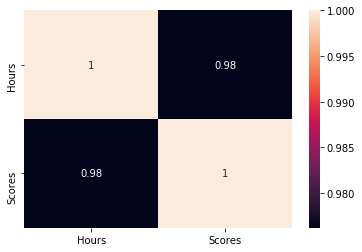

In [10]:
sns.heatmap(df.corr(),annot=True)

The above heat map shows that the two features/variables i.e. Scores and Hours are higly correlated with each other with correlation coefficient of 0.98. This implies that there is a positive relation between the two variables, meaning that as one variable increases in value, so does the other.

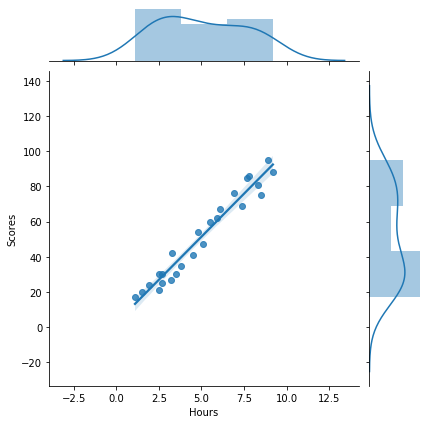

In [11]:
sns.jointplot(x=df['Hours'],y=df['Scores'],data=df,kind='reg')

The above regression clearly shows that there is a linear relationship between the hours studied per day and the scores of a student which means the more hours a student spends on studying per day the more scores he/she is going to get.

In [13]:
#Splitting the data into dependent and independent variable
X=df.iloc[:,:-1].values  #Independent variable
y=df.iloc[:,1].values  #Dependent variable

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Training the Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [19]:
print(lm.intercept_)

3.1286342191217287


In [21]:
print(lm.coef_)

[9.50945603]


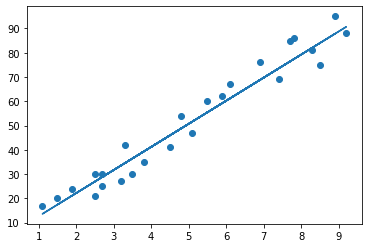

In [22]:
#The regression line will be
line=lm.coef_*X+lm.intercept_
#Plotting for test data
plt.scatter(X,y)
plt.plot(X,line)

## Predictions

In [37]:
predictions=lm.predict(X_test)

In [36]:
# Comparing actual vs predicted values
df1=pd.DataFrame({'Actual':y_test,'Predicted': predictions})
df1.head()

,Actual,Predicted
0,60,55.430642
1,30,36.411730
2,24,21.196601
3,76,68.743881
4,54,48.774023


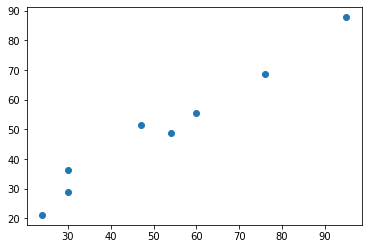

In [38]:
plt.scatter(y_test,predictions)

If we get a line like this we know that we have done a pretty good job.It means that a straight line would be perfectly correct predictions.

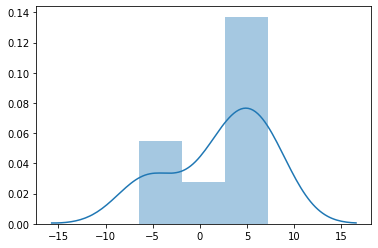

In [31]:
#Plotting the residuals i.e. the difference between actual value and prediction.
sns.distplot((y_test-predictions))

Notice here that our residuals looks to be normally distributed. If we have a normally distributed residuals it means our model was the correct choice for the data.

## Predicting the score when the student studies for 9.25 hrs/day

In [43]:
print(lm.predict([[9.25]]))

[91.09110246]


The student's predicted score when he/she studies for 9.25 hrs/day is around 91.1.

## Regression Evaluation Metrics

In [49]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 4.915810617363598
Mean Squared Error: 28.128185371211515
Root Mean Squared Error: 5.303601170074114
